In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from config import DATA_DIR

In [3]:
# Load the data
df = pd.read_csv(os.path.join(DATA_DIR, 'sample_contributions.csv'))

df.head()

/var/folders/bk/0sfrfl4n3nl9319cdqyxqb740000gn/T/ipykernel_90405/3386268877.py:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR, 'sample_contributions.csv'))


,Unnamed: 0,cycle,transaction.id,transaction.type,amount,date,bonica.cid,contributor.name,contributor.lname,contributor.fname,...,efec.transaction.id.orig,bk.ref.transaction.id,efec.org.orig,efec.comid.orig,efec.form.type,excluded.from.scaling,contributor.cfscore,candidate.cfscore,Repeat_Donor,scaled_amount
0,0,1980,indv:1980:304289,15,500.0,1980-03-25,2650860621,"goland, michael",goland,michael,...,NaN,NaN,NaN,NaN,NaN,0,-0.14,0.90,True,0.10
1,1,1980,indv:1980:295803,15,1000.0,1980-04-12,29185953333,"hornung, william p",hornung,william,...,NaN,NaN,NaN,NaN,NaN,0,1.28,0.60,False,0.20
2,6,1980,indv:1980:321651,15,300.0,1980-07-25,5000002921978515,"schnabel, erma j",schnabel,erma,...,NaN,NaN,NaN,NaN,NaN,0,0.88,0.63,False,0.06
3,8,1980,indv:1980:257533,15,500.0,1980-09-15,5000002875958729,"hudson, mary l",hudson,mary,...,NaN,NaN,NaN,NaN,NaN,1,-0.14,-0.14,False,0.10
4,15,1980,indv:1980:158460,15,1000.0,1980-01-22,2710891395,"linder, morris b",linder,morris,...,NaN,NaN,NaN,NaN,NaN,0,1.14,1.07,False,0.20


It looks like some of the contributions are not from individuals. For the purpose of this project, we'll only do analysis on individual contributors, which we'll consider to be people with a first and last name.

We should also process bonica.cid as a string, date as a date, etc.

In [4]:
# Process the id column
df['bonica.cid'] = df['bonica.cid'].astype(float).round(0).astype(int)

# Process the date column, eliminating rows with missing dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Eliminate records without a first and last name
df = df[~df['contributor.fname'].isnull()]
df = df[~df['contributor.lname'].isnull()]

In [5]:
df.head()

,Unnamed: 0,cycle,transaction.id,transaction.type,amount,date,bonica.cid,contributor.name,contributor.lname,contributor.fname,...,efec.transaction.id.orig,bk.ref.transaction.id,efec.org.orig,efec.comid.orig,efec.form.type,excluded.from.scaling,contributor.cfscore,candidate.cfscore,Repeat_Donor,scaled_amount
0,0,1980,indv:1980:304289,15,500.0,1980-03-25,2650860621,"goland, michael",goland,michael,...,NaN,NaN,NaN,NaN,NaN,0,-0.14,0.90,True,0.10
1,1,1980,indv:1980:295803,15,1000.0,1980-04-12,29185953333,"hornung, william p",hornung,william,...,NaN,NaN,NaN,NaN,NaN,0,1.28,0.60,False,0.20
2,6,1980,indv:1980:321651,15,300.0,1980-07-25,5000002921978515,"schnabel, erma j",schnabel,erma,...,NaN,NaN,NaN,NaN,NaN,0,0.88,0.63,False,0.06
3,8,1980,indv:1980:257533,15,500.0,1980-09-15,5000002875958729,"hudson, mary l",hudson,mary,...,NaN,NaN,NaN,NaN,NaN,1,-0.14,-0.14,False,0.10
4,15,1980,indv:1980:158460,15,1000.0,1980-01-22,2710891395,"linder, morris b",linder,morris,...,NaN,NaN,NaN,NaN,NaN,0,1.14,1.07,False,0.20


In [6]:
# What's the minimum and maximum date?
print(df['date'].min(), df['date'].max())

# Eliminate all dates after 2000 or before 1980
df = df[df['date'] >= '1980-01-01']
df = df[df['date'] <= '2000-12-31']

print(df['date'].min(), df['date'].max())

1980-01-01 00:00:00 2000-06-13 00:00:00
1980-01-01 00:00:00 2000-06-13 00:00:00


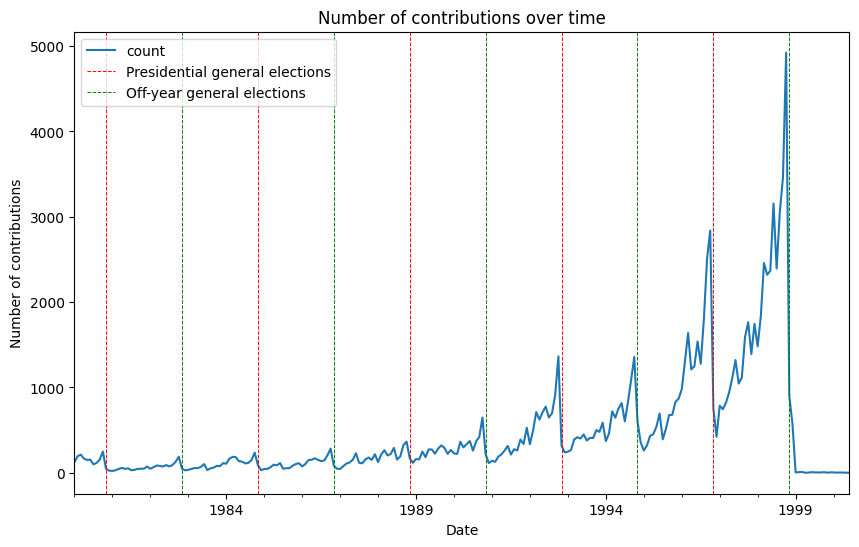

In [7]:
# Plot the number of contributions over time, grouping by month
plt.figure(figsize=(10, 6))
grouped = df['date'].dt.to_period('M').value_counts().sort_index()
grouped.plot()

# Add vertical dashed lines at the major general election dates
plt.axvline('1980-11-04', color='r', linestyle='--', linewidth=0.7, label='Presidential general elections')
plt.axvline('1982-11-02', color='g', linestyle='--', linewidth=0.7, label='Off-year general elections')
plt.axvline('1984-11-06', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1986-11-04', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1988-11-08', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1990-11-06', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1992-11-03', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1994-11-08', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1996-11-05', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1998-11-03', color='g', linestyle='--', linewidth=0.7)

plt.xlabel('Date')
plt.ylabel('Number of contributions')
plt.title('Number of contributions over time')
plt.legend(loc='upper left')
plt.show()

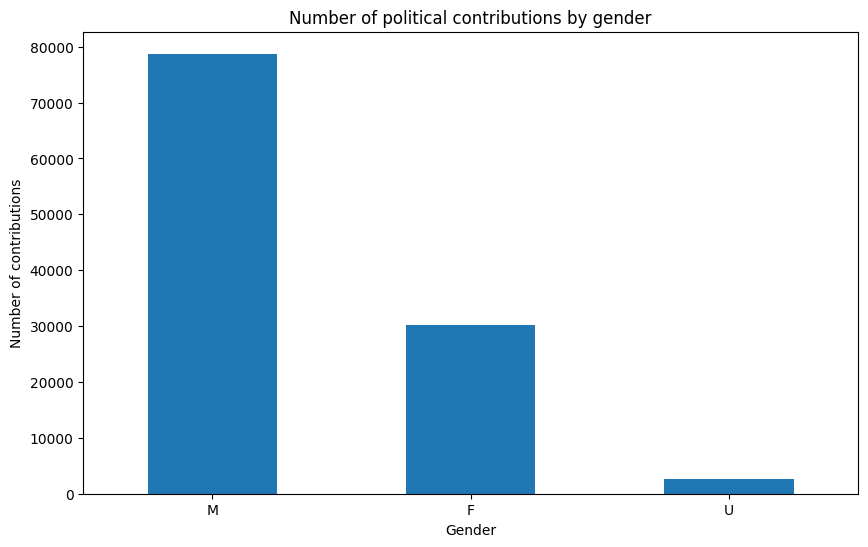

In [8]:
plt.figure(figsize=(10, 6))
df['contributor.gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of contributions')
plt.title('Number of political contributions by gender')
plt.xticks(rotation=0)
plt.show()


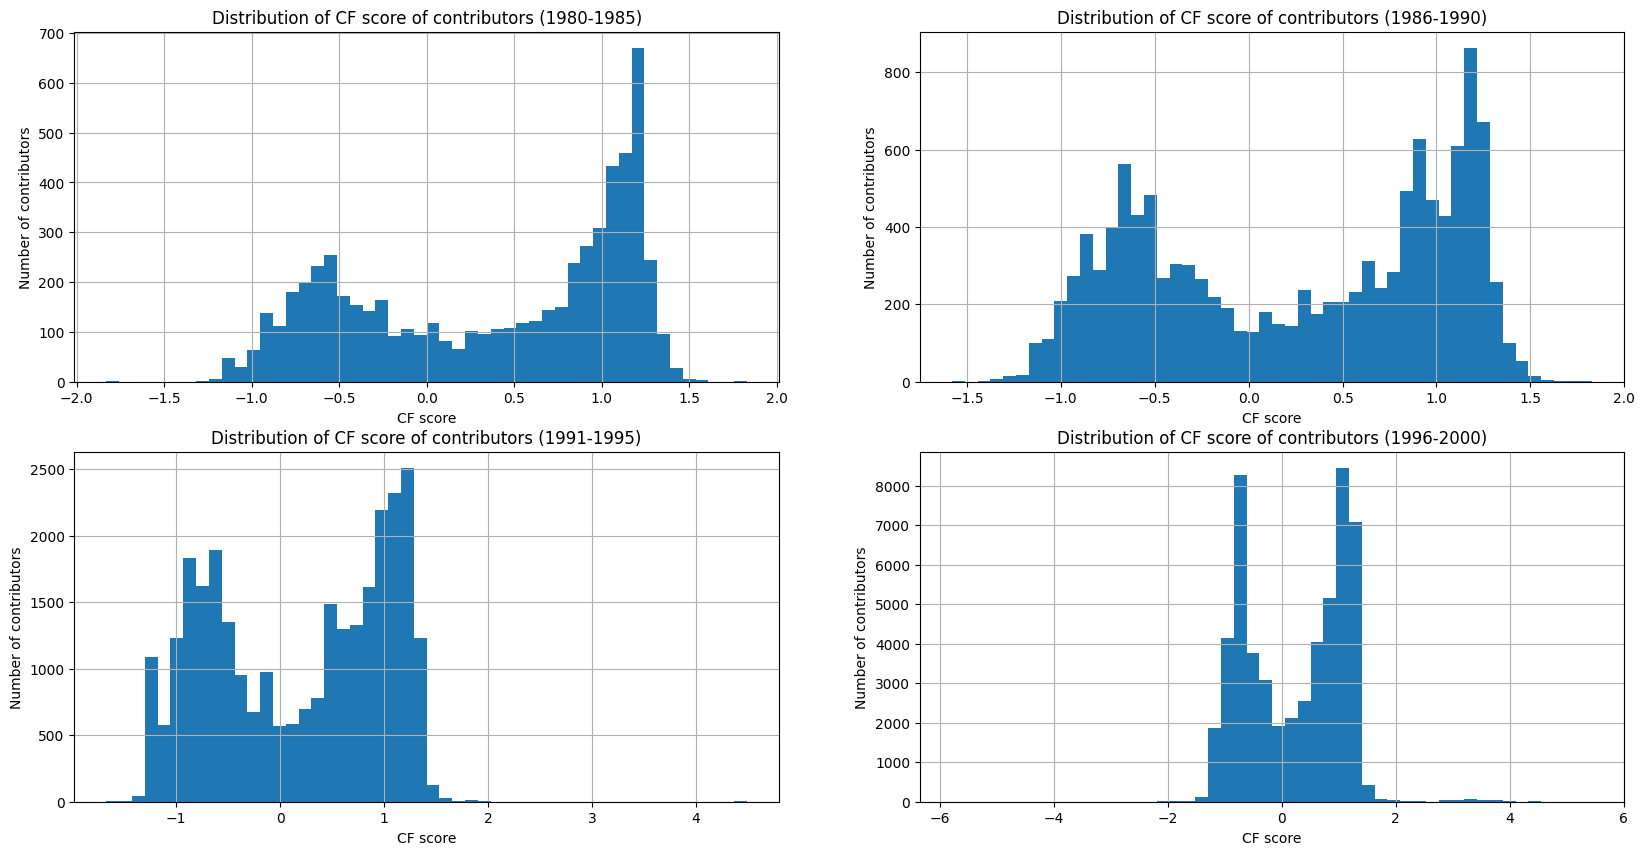

In [9]:
# Split the time period into four equal intervals
time_periods = ['1980-1985', '1986-1990', '1991-1995', '1996-2000']

# Plot the distribution of CF score of contributors over time
plt.subplots(2, 2, figsize=(20, 10))
for i, period in enumerate(time_periods):
    plt.subplot(2, 2, i + 1)
    df[df['date'].dt.year.between(int(period[:4]), int(period[-4:]))]['contributor.cfscore'].hist(bins=50)
    # plt.xlim(-2, 2)
    plt.xlabel('CF score')
    plt.ylabel('Number of contributors')
    plt.title(f'Distribution of CF score of contributors ({period})')


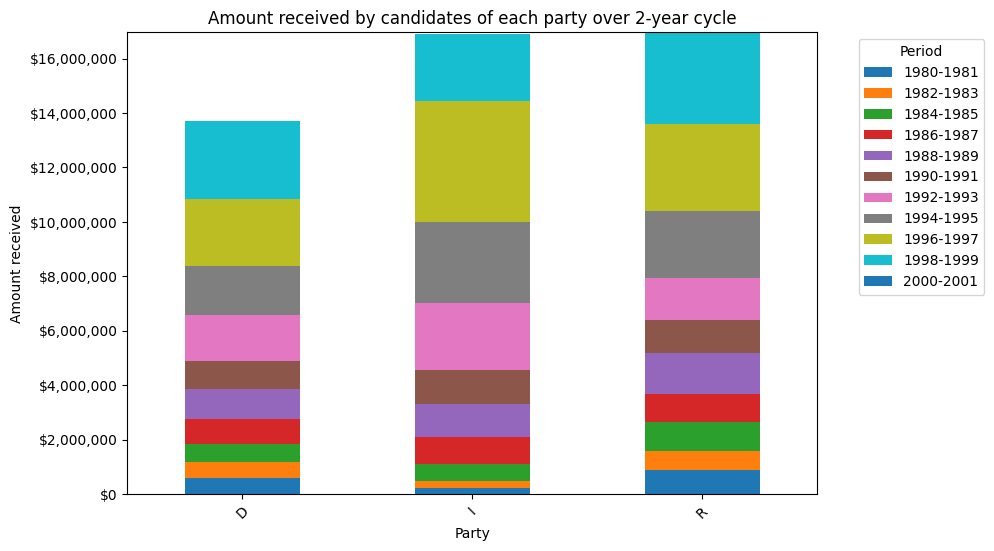

In [10]:
import matplotlib.ticker as ticker
# Number of dollars received by candidates of each party over time

# Just for this graph, group non-major parties together (100 = D, 200 = R, all else = I)
df_party = df.copy()

def party(x):
    try:
        if int(x) == 100:
            return 'D'
        elif int(x) == 200:
            return 'R'
        else:
            return 'I'
    except ValueError:
        return 'I'
    

df_party['recipient.party'] = df_party['recipient.party'].apply(party)

# Calculate periods
min_year = df_party['date'].dt.year.min()
df_party['period'] = ((df_party['date'].dt.year - min_year) / 2).astype(int)

# Create a label for each period that shows the start and end year
def period_label(row):
    start_year = min_year + row['period'] * 2
    return f'{start_year}-{start_year + 1}'

df_party['period_label'] = df_party.apply(period_label, axis=1)

# Group by party and period_label, then sum amounts
grouped = df_party.groupby(['recipient.party', 'period_label'])['amount'].sum().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adjustments and formatting
plt.subplots_adjust(right=0.7)
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left', labels=grouped.columns)
plt.xlabel('Party')
plt.ylabel('Amount received')
plt.title('Amount received by candidates of each party over 2-year cycle')
plt.xticks(rotation=45) # Rotate labels to fit them better

# Money formatter
def money_formatter(x, pos):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(money_formatter))

plt.show()

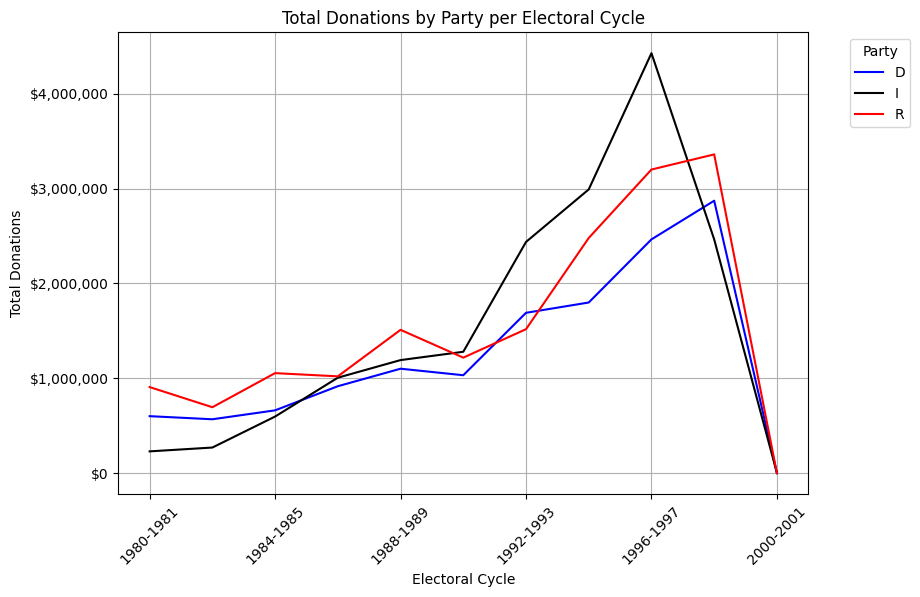

In [11]:
# Adjusted plotting section with specified line colors
fig, ax = plt.subplots(figsize=(12, 6))

party_grouped = df_party.groupby(['period_label', 'recipient.party'])['amount'].sum().unstack(fill_value=0)

# Specify colors for each line according to the party
colors = {'D': 'blue', 'R': 'red', 'I': 'black'}

# Check and order colors according to the party order in 'grouped' DataFrame
line_colors = [colors[party] for party in party_grouped.columns if party in colors]

# for party in party_grouped.columns:

# Plot each party as a line with specified colors
party_grouped.plot(kind='line', ax=ax, color=line_colors)

# Adjustments and formatting
plt.subplots_adjust(right=0.7)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Electoral Cycle')
plt.ylabel('Total Donations')
plt.title('Total Donations by Party per Electoral Cycle')
plt.xticks(rotation=45)

# Use custom formatter for the y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(money_formatter))

plt.grid(True)
plt.show()

### Target Exploration

#### Negative Target Amount

In [12]:
len(df[df['amount'] < 0])

1727

#### Outliers

In [13]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
outlier_count = outliers.shape[0]

lower_bound, upper_bound, outlier_count

(-687.5, 1212.5, 3582)

#### Distribution

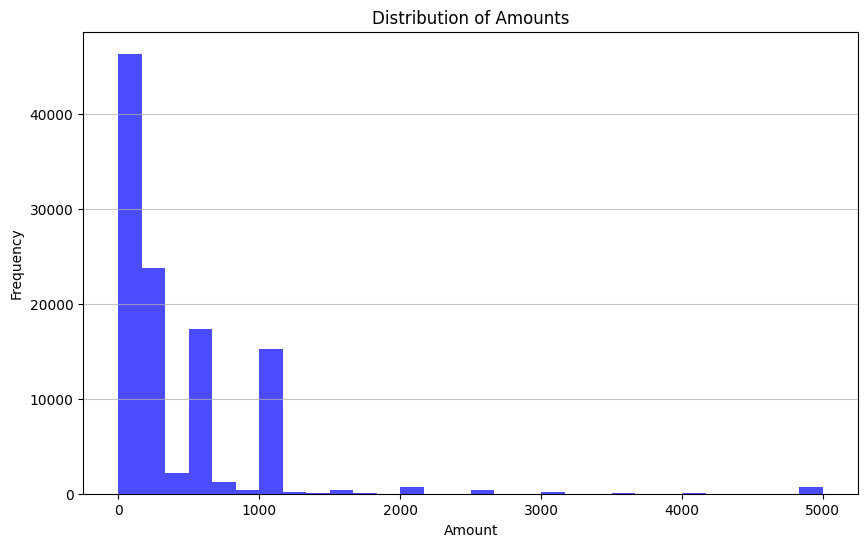

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['amount'], bins=30, alpha=0.7, color='blue', range=(0, 5000))
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [16]:
# total repeat donors
n_unique_donors = df['bonica.cid'].nunique()
n_transactions = df.shape[0]
print("unique contributors:", n_unique_donors)
print("total number of transactions:", df.shape[0])
print("repeat donors:", n_transactions - n_unique_donors)

unique contributors: 103260
total number of transactions: 111544
repeat donors: 8284


The overwhelming majority are first-time donors, but a non-trivial number have made repeat donations. We want to analyze repeat donors separately, as a special case. 

Also, for future analysis, we want to convert dollar amounts to logits, to prevent scaling issues.

In [17]:
df['Repeat_Donor'] = df['contributor.name'].duplicated(keep=False)

# Scale the dollar amount by 5000
scale_factor = np.float64(5000.0)
df['scaled_amount'] = df['amount'].astype(np.float64) / scale_factor

df.to_csv(os.path.join(DATA_DIR, 'sample_contributions.csv'))